In [232]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/alzheimer_data.csv')

In [235]:
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.00,120.80,86.85,957,6601,0.36,0.22,103.83,...,0.14,0.02,5.60,3.18,71,40120,1749.28,296102.77,144605,P
1,id_2,51980,0.00,115.32,83.45,1694,6998,0.27,0.14,99.38,...,0.05,0.02,1.67,0.95,129,126700,1504.77,278744.28,298640,P
2,id_3,2600,0.00,229.93,172.76,2333,5802,0.39,0.18,201.35,...,0.18,0.02,4.00,2.39,74,45480,1431.44,144411.71,79025,P
3,id_4,2130,0.00,369.40,183.19,1756,8159,0.56,0.16,276.30,...,0.11,0.02,4.21,1.61,123,67945,1465.84,230184.72,181220,P
4,id_5,2310,0.00,258.00,111.28,987,4732,0.27,0.15,184.64,...,0.12,0.02,3.32,1.68,92,37285,1841.70,158290.03,72575,P


In [236]:
df.shape

(174, 452)

In [237]:
# Collecting count of different datatypes in each column.

from collections import Counter

dtypes = Counter()
for col in df.columns:
    dtype = df[col].dtype.name
    dtypes[dtype] += 1
dtypes

Counter({'object': 2, 'int64': 150, 'float64': 300})

In [238]:
# Identifying the objects in the dataset.

for col in df.columns:
    if df[col].dtype.name == "object":
        print(col)

ID
class


In [239]:
df["class"].value_counts()

P    89
H    85
Name: class, dtype: int64

In [240]:
pip install matplotlib seaborn

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
correlation_matrix = df.corr()
correlation_matrix.shape

(450, 450)

In [243]:
corr_treshhold = 0.8

most_correlated = []

correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_treshhold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            value = correlation_matrix.iloc[i, j]
            most_correlated.append((col1, col2, value))
            correlated_columns.add(col1)
            correlated_columns.add(col1)

most_correlated.sort(key=lambda x: abs(x[2]), reverse=True)

In [244]:
most_correlated

[('total_time19', 'air_time19', 0.9999921286026402),
 ('mean_jerk_in_air17', 'mean_acc_in_air17', 0.9998330154135047),
 ('mean_jerk_in_air21', 'mean_acc_in_air21', 0.9997638637733229),
 ('total_time14', 'air_time14', 0.9997278497005098),
 ('mean_jerk_in_air7', 'mean_acc_in_air7', 0.9996565043185508),
 ('mean_jerk_in_air6', 'mean_acc_in_air6', 0.9994595652670057),
 ('mean_jerk_in_air25', 'mean_acc_in_air25', 0.9994267413841926),
 ('total_time22', 'air_time22', 0.9994122697463722),
 ('mean_jerk_in_air24', 'mean_acc_in_air24', 0.9993196000455227),
 ('total_time25', 'air_time25', 0.9992938410170538),
 ('mean_jerk_in_air14', 'mean_acc_in_air14', 0.9989347645934287),
 ('mean_jerk_in_air19', 'mean_acc_in_air19', 0.9986653855166322),
 ('mean_jerk_in_air16', 'mean_acc_in_air16', 0.9985796937045512),
 ('mean_jerk_in_air9', 'mean_acc_in_air9', 0.9984873521607981),
 ('mean_jerk_in_air15', 'mean_acc_in_air15', 0.9983580491114624),
 ('total_time11', 'air_time11', 0.9980103350590476),
 ('mean_jerk_in

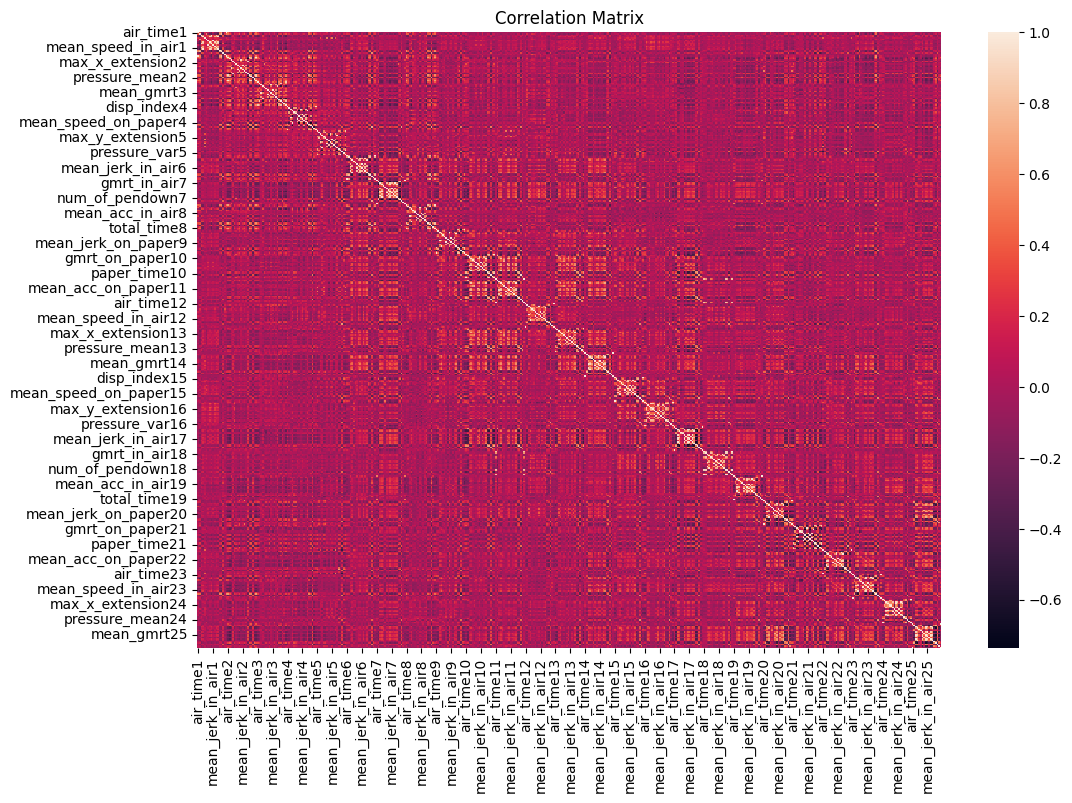

In [245]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix")
plt.show()

In [246]:
y = df['class']

X = df.drop(['class', 'ID'], axis=1)

X.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.00,120.80,86.85,957,6601,0.36,0.22,103.83,0.05,...,249.73,0.14,0.02,5.60,3.18,71,40120,1749.28,296102.77,144605
1,51980,0.00,115.32,83.45,1694,6998,0.27,0.14,99.38,0.04,...,77.26,0.05,0.02,1.67,0.95,129,126700,1504.77,278744.28,298640
2,2600,0.00,229.93,172.76,2333,5802,0.39,0.18,201.35,0.06,...,193.67,0.18,0.02,4.00,2.39,74,45480,1431.44,144411.71,79025
3,2130,0.00,369.40,183.19,1756,8159,0.56,0.16,276.30,0.09,...,163.07,0.11,0.02,4.21,1.61,123,67945,1465.84,230184.72,181220
4,2310,0.00,258.00,111.28,987,4732,0.27,0.15,184.64,0.04,...,147.09,0.12,0.02,3.32,1.68,92,37285,1841.70,158290.03,72575


In [247]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 450)
(53, 450)
(121,)
(53,)


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

rf = ExtraTreesClassifier(random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("RF Accuracy:", rf_accuracy)

RF Accuracy: 0.8490566037735849


In [249]:
features = X.columns.tolist()

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

print(feature_importances)

[('total_time6', 0.0141298), ('air_time16', 0.0136858), ('pressure_var19', 0.0118204), ('total_time15', 0.0113955), ('air_time15', 0.0113356), ('num_of_pendown19', 0.011076), ('pressure_var5', 0.0100352), ('total_time13', 0.0098974), ('max_x_extension22', 0.0096899), ('gmrt_in_air23', 0.0094334), ('air_time5', 0.0094056), ('air_time3', 0.0086426), ('gmrt_in_air7', 0.0082858), ('paper_time6', 0.0076997), ('mean_speed_in_air17', 0.0076947), ('total_time9', 0.0076368), ('disp_index22', 0.0076066), ('total_time16', 0.007504), ('air_time22', 0.007411), ('air_time10', 0.0072469), ('pressure_var4', 0.0071624), ('pressure_mean5', 0.0069835), ('total_time22', 0.0066847), ('paper_time9', 0.0063473), ('mean_speed_on_paper15', 0.0062665), ('air_time9', 0.0060689), ('mean_gmrt17', 0.0060112), ('mean_gmrt7', 0.0059959), ('air_time23', 0.0058911), ('paper_time19', 0.0058624), ('disp_index23', 0.0058342), ('total_time12', 0.0058012), ('air_time6', 0.0057257), ('total_time7', 0.0057216), ('gmrt_in_air1

In [250]:
from sklearn.preprocessing import MinMaxScaler

importance_values = [pair[1] for pair in feature_importances]

# Reshape the data for MinMaxScaler
importance_values = [[val] for val in importance_values]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the importance values
normalized_importance = scaler.fit_transform(importance_values).flatten()

# Combine the normalized values with the original ColumnID
normalized_array = [(pair[0], normalized_importance[i]) for i, pair in enumerate(feature_importances)]

print("\nNormalized Array of Pairs (ColumnID, Normalized Importance):")
print(normalized_array)


Normalized Array of Pairs (ColumnID, Normalized Importance):
[('total_time6', 0.9999999999999999), ('air_time16', 0.968577049922858), ('pressure_var19', 0.8365581961528118), ('total_time15', 0.8064869991082676), ('air_time15', 0.8022477317442568), ('num_of_pendown19', 0.7838752140865405), ('pressure_var5', 0.7102152896714744), ('total_time13', 0.7004628515619471), ('max_x_extension22', 0.685777576469589), ('gmrt_in_air23', 0.667624453283132), ('air_time5', 0.6656569802828065), ('air_time3', 0.6116576313889793), ('gmrt_in_air7', 0.5864060354711319), ('paper_time6', 0.5449263259211029), ('mean_speed_in_air17', 0.5445724638706846), ('total_time9', 0.5404747413268411), ('disp_index22', 0.5383374145423148), ('total_time16', 0.531076165267732), ('air_time22', 0.5244943311299523), ('air_time10', 0.5128805786352248), ('pressure_var4', 0.5069003099831562), ('pressure_mean5', 0.49423912581919066), ('total_time22', 0.47309232968619513), ('paper_time9', 0.44921371852397063), ('mean_speed_on_paper

In [251]:
col_importance_score = {}

for col,score in normalized_array:
    col_importance_score[col] = score

cols_to_remove = set()

for col1, col2, val in most_correlated:
    if col_importance_score[col1]<col_importance_score[col2]:
        cols_to_remove.add(col1)
    else:
        cols_to_remove.add(col2)

len(cols_to_remove)


177

In [252]:
X.drop(cols_to_remove,axis=1,inplace=True)

In [253]:
X.shape

(174, 273)

In [254]:
for i,col in enumerate(X.columns):
    X[col] = X[col]*col_importance_score[col]

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,recall_score, precision_score, f1_score, classification_report

import xgboost as xgb
from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, shuffle=True, random_state=3)

In [257]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

scaler1.fit(X_train)
scaler2.fit(X_test)

X_train = pd.DataFrame(scaler1.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = pd.DataFrame(scaler2.transform(X_test),  index=X_test.index,  columns=X_test.columns)


print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (137, 273)
X Test  :  (37, 273)
Y Train :  (137,)
Y Test  :  (37,)


In [258]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [259]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [260]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.95,0.92,None,0.94,0.21
BernoulliNB,0.84,0.79,None,0.83,0.02
LinearSVC,0.81,0.78,None,0.81,0.05
CalibratedClassifierCV,0.81,0.78,None,0.81,0.05
SGDClassifier,0.81,0.78,None,0.81,0.04
Perceptron,0.81,0.78,None,0.81,0.02
PassiveAggressiveClassifier,0.81,0.78,None,0.81,0.02
NearestCentroid,0.81,0.78,None,0.81,0.02
LogisticRegression,0.81,0.78,None,0.81,0.06
